# Look at the TGASxWrightx2MASS catalog of stars (TGAS closer than 125 pc)

This is looking at the vot that resulted from the XMatch of the TGAs 125 pc catalog and the Wright et al catalog of spectral info for TGAS stars and 2MASS. The match was done by Visizer XMatch service. There are 28815 source in the cross-matched catalog

Importing some modules (libraries) and giving them short names such as **np** and **plt**. You will find that most users will use these common ones.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Now lets use astropy table reader... because it is easier..

A file with the extension .vot is an virtual observatory table type. astropy knows this format: votable. Lets read the file into a structure "t". Nice work astropy people!

In [2]:
from astropy.table import Table
t = Table.read('TgasxWrightx2mass.vot', format='votable')

print(t)



WARNING

      d_arcsec            d_arcsec_2      ...  X      MeasureJD     
        arcs                 arcs         ...             d         
-------------------- -------------------- ... --- ------------------
 0.60932799999999998  0.58564499999999997 ...   0 2451477.8113000002
  2.7272609999999999   2.8163619999999998 ...   0 2451575.8741000001
  1.8428100000000001  0.29380600000000001 ...   0 2451142.9920000001
 0.72121599999999997  0.19058800000000001 ...   0 2451682.7418999998
            1.041955  0.98780500000000004 ...   0 2451355.7990000001
 0.50914599999999999  0.52508500000000002 ...   0 2451477.8154000002
  1.1693359999999999  0.94533400000000001 ...   0 2450838.7818999998
  2.7509899999999998             2.801396 ...   0 2451575.8741000001
 0.92219399999999996  0.86115600000000003 ...   0       2450971.8325
            2.453678   2.1731660000000002 ...   0 2451110.8056999999
                 ...                  ... ... ...                ...
 0.52314099999999997  0.1926460000

: W32: TgasxWrightx2mass.vot:31:0: W32: Duplicate ID 'TYC2' renamed to 'TYC2_2' to ensure uniqueness [astropy.io.votable.tree]


## Access to values within the table...

Astropy reads both the header information and the ascii column information. The data in the columns of the table go into the structure with labels corresponding to the column header title... for example

In [3]:
print("The astropy reader loads the data into the following variable names:")
print(t.colnames)

The astropy reader loads the data into the following variable names:
['d_arcsec', 'd_arcsec_2', '_RAJ2000', '_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var', 'TYC1', 'TYC2_2', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Mag', 'Teff', 'SpType', '_2MASS', 'RAJ2000_2', 'DEJ2000_2', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD']


## so you can access, for example, the parallax, or phot_g_mean_mag

In [15]:
print(t["Source","d_arcsec","__Gmag_","Kmag","Qfl"])

       Source             d_arcsec        __Gmag_     Kmag   Qfl
                            arcs            mag       mag       
------------------- -------------------- --------- --------- ---
4655830482578137344  0.60932799999999998 9.2159996 7.8379998 AAA
3487237020257152640   2.7272609999999999 9.6499996 8.1759996 AAA
 627906248532034688   1.8428100000000001 9.0050001 7.5370002 AAA
1399531345558458880  0.72121599999999997 8.0950003 6.9330001 AAA
6882602216151398784             1.041955 9.8540001 8.5360003 AAA
4655833952911711488  0.50914599999999999 9.5389996 8.4499998 AAA
 627954523964445952   1.1693359999999999     7.743 6.5339999 AAA
3487243033211366656   2.7509899999999998 8.6350002     7.494 AAA
6882818304546426752  0.92219399999999996 7.8629999 6.9289999 AAA
4655882675012240128             2.453678 7.6570001 6.2839999 AAA
                ...                  ...       ...       ... ...
4889439904192305536  0.52314099999999997    10.151 8.8199997 AAA
5713669142188255232  0.81

## Make some interesting plots

histograms of magnitudes in G, J and K, Color-Color diagrams

Kmag count before mask:  28794
Kmag masked count:  28794


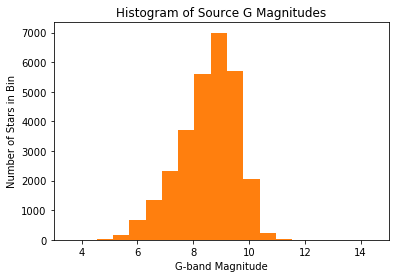

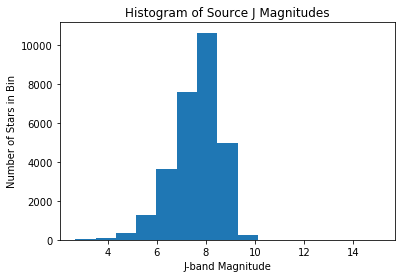

C:\Users\lgm\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6181: RuntimeWarning: invalid value encountered in less
  xmin = min(xmin, xi.min())
C:\Users\lgm\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6182: RuntimeWarning: invalid value encountered in greater
  xmax = max(xmax, xi.max())


ValueError: max must be larger than min in range parameter.

In [14]:
import numpy.ma as ma
gmags = t["__Gmag_"]
jmags = t["Jmag"]
hmags = t["Hmag"]
kmags = t["Kmag"]
m_min = 0
m_max = 16
kmagmask = ma.masked_outside(kmags,m_min,m_max)
print('Kmag count before mask: ',kmags.count())
print('Kmag masked count: ',kmagmask.count())
bins = 15
plt.xlabel('G-band Magnitude')
plt.ylabel('Number of Stars in Bin')
plt.title('Histogram of Source G Magnitudes')
plt.hist(gmags,bins)
plt.show()

plt.xlabel('J-band Magnitude')
plt.ylabel('Number of Stars in Bin')
plt.title('Histogram of Source J Magnitudes')
plt.hist(jmags,bins)
plt.show()

plt.xlabel('H-band magnitude')
plt.ylabel('Number of Stars in Bin')
plt.title('Histogram of Source H Magnitudes')
plt.hist(hmags,bins)
plt.show()


Hmmm. Why is the Teff so sharply peaked around 4,000 to 8,000 K? 


## Now lets try some plots to look at the data in different ways.
Teff versus magnitude (this is apparent magnitude. 

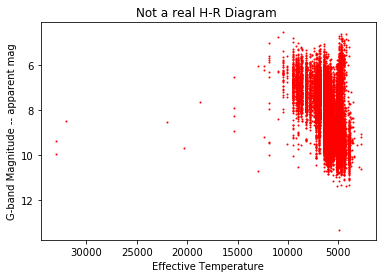

In [31]:
plt.xlabel('Effective Temperature')
plt.ylabel('G-band Magnitude -- apparent mag')
plt.title('Not a real H-R Diagram ')
plt.scatter(teff,mags,s=1.0,c='r')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.show()

Ok. What is odd about the graph above which was also apparent in the histogram of Teff? Why aren't there more star with Teff below 5,000 or 4,000? And, what is up with the few stars that are very hot but still not that bright? 

Hmmm.  We have to look into those hot guys.

Next lets create the absolute magnitudes for the stars from the G-band mag and the distance. I have restricted the x-axis in the plot to give a better look at the data from Teff 3,200 to 12,000 K. The color is the distance as shown on the color bar.

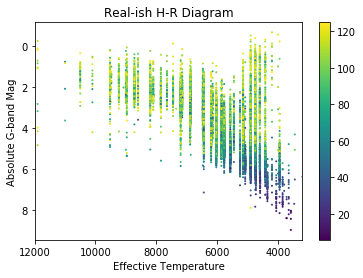

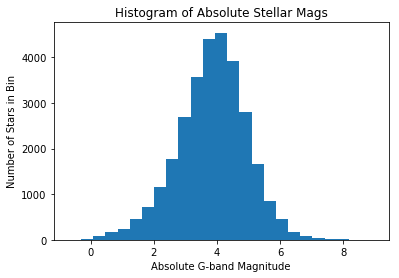

In [32]:
absmags = mags + 5 - 5 * np.log10(dist)
plt.xlabel('Effective Temperature')
plt.ylabel('Absolute G-band Mag')
plt.title('Real-ish H-R Diagram')

plt.scatter(teff,absmags,s=1.0,c=dist)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlim(12000,3200)
plt.colorbar()
plt.show()

plt.xlabel("Absolute G-band Magnitude")
plt.ylabel("Number of Stars in Bin")
plt.title("Histogram of Absolute Stellar Mags")
plt.hist(absmags,bins)
plt.show()

Does the spread of the width of the "main sequence surprise you? The vertical dispersion between 9,000 K and 6,000 K where you have small contamination by the giant branch is >2 magnitudes peak-to-peak; 2 mag is roughly a factor of 6 in luminosity. We saw previously that the error in the distance was as large as ~15% which could be a 35-40% error in luminosity. We don't have good knowledge of the error in the Teff.

Hmmm. We need to think about possible reasons for the dispersion.

The histogram of absolute G-band magnitudes peaks around 4th mag. Is that consistent with what you expect? Why are there few stars brighter than 0 mag and few fainter than 7th mag?